# 🛍️ E-Commerce Sales Analysis 
### Business Intelligence & Customer Insights Project

---
### 📌 Objective
Analyze transactional retail data to uncover revenue trends, customer behavior patterns, product performance, and geographic insights.

### 🛠️ Tools & Skills Demonstrated
- Python (Pandas, NumPy)
- Data Cleaning & Preprocessing
- Feature Engineering
- Data Visualization (Matplotlib, Seaborn)
- Business Insight Generation

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

## 📂 Load Dataset

In [2]:
df = pd.read_excel('online_retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 🧹 Data Cleaning

In [3]:
# Remove missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Remove cancelled/invalid transactions
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df.reset_index(drop=True, inplace=True)
df.shape

(397884, 8)

## ⚙️ Feature Engineering

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

total_revenue = df['Revenue'].sum()
total_revenue

np.float64(8911407.904)

## 📈 Monthly Revenue Trend

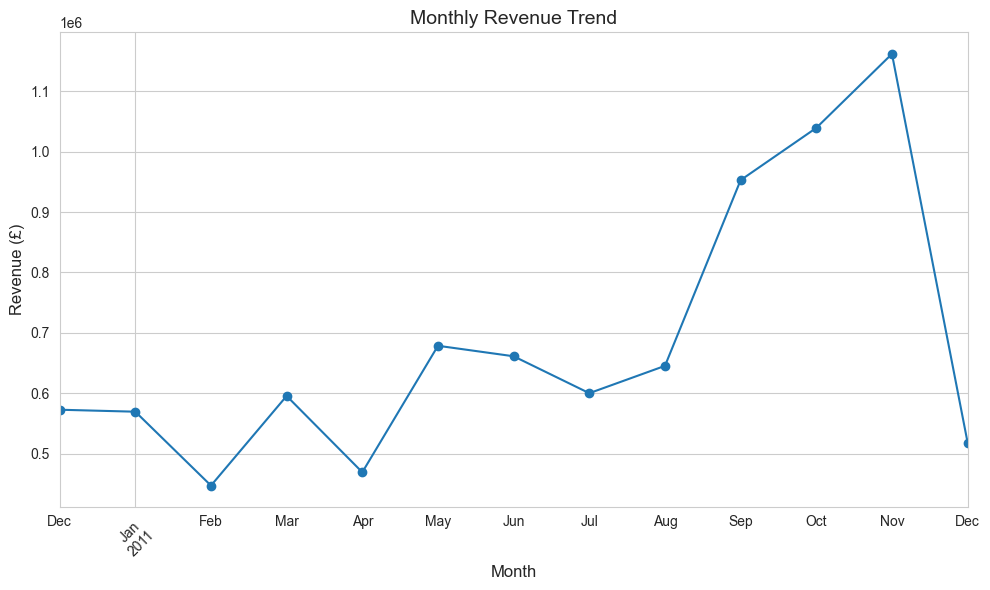

In [5]:
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().sort_index()

monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏆 Top 10 Products by Revenue

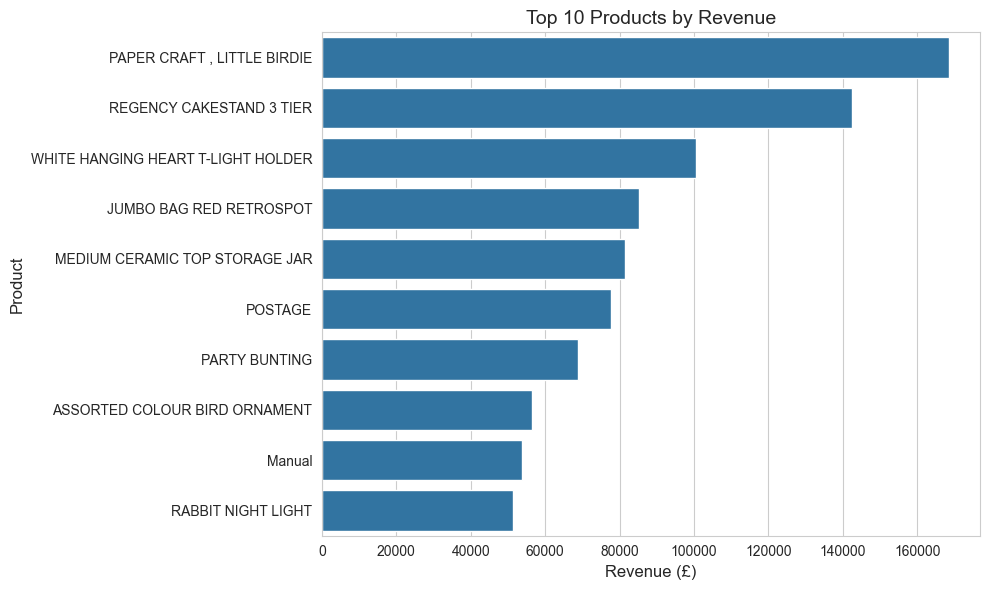

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

In [6]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

top_products

## 🌍 Top 10 Countries by Revenue

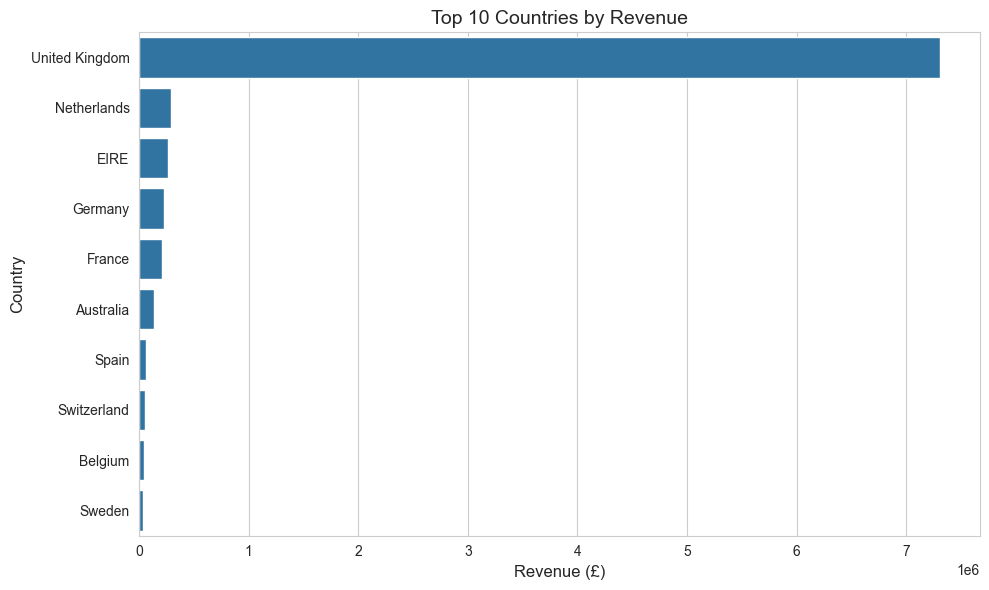

Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

In [7]:
top_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

top_countries

## 👥 Customer Analysis

In [8]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
top_customers = customer_revenue.head(10)

customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customers = (customer_orders > 1).sum()
one_time_customers = (customer_orders == 1).sum()
repeat_percentage = round((repeat_customers / len(customer_orders)) * 100, 2)

top_customers, repeat_customers, one_time_customers, repeat_percentage

(CustomerID
 14646.0    280206.02
 18102.0    259657.30
 17450.0    194550.79
 16446.0    168472.50
 14911.0    143825.06
 12415.0    124914.53
 14156.0    117379.63
 17511.0     91062.38
 16029.0     81024.84
 12346.0     77183.60
 Name: Revenue, dtype: float64,
 np.int64(2845),
 np.int64(1493),
 np.float64(65.58))

---
## 📊 Key Business Insights

- Strong revenue concentration in the UK market
- Clear seasonal sales spike in Q4 (holiday effect)
- High-value customers significantly impact revenue
- Majority of customers are repeat buyers (strong retention)

## 💼 Business Recommendations
- Expand marketing in top-performing international markets
- Launch loyalty programs targeting repeat customers
- Prepare inventory and campaigns ahead of Q4 surge

---
### 🚀 End of Analysis